In [10]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import Aer

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Function to apply gates to one-qubit basis states
def apply_gates_to_one_qubit():
    # Define the basis states |0⟩ and |1⟩
    basis_states = ['|0⟩', '|1⟩']
    
    # Define the gates to be applied
    gates = ['X', 'Y', 'Z', 'H', 'S']
    
    # Initialize the simulator
    simulator = Aer.get_backend('statevector_simulator')
    
    for state in basis_states:
        for gate in gates:
            qc = QuantumCircuit(1)  # Create a quantum circuit with 1 qubit
            if state == '|1⟩':
                qc.x(0)  # Apply X gate to initialize |1⟩
            
            if gate == 'X':
                qc.x(0)
            elif gate == 'Y':
                qc.y(0)
            elif gate == 'Z':
                qc.z(0)
            elif gate == 'H':
                qc.h(0)
            elif gate == 'S':
                qc.s(0)
            
            # # Execute the circuit
            # backend = Aer.get_backend('qasm_simulator')

            # simulator = Aer.get_backend("qasm_simulator")
            result = transpile(qc, simulator)
            result = simulator.run(result).result()
            statevector = result.get_statevector()
            
            print(f"State: {state}, Gate: {gate}, Resulting State: {statevector}")

# Run the function
apply_gates_to_one_qubit()

State: |0⟩, Gate: X, Resulting State: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
State: |0⟩, Gate: Y, Resulting State: Statevector([0.-0.j, 0.+1.j],
            dims=(2,))
State: |0⟩, Gate: Z, Resulting State: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))
State: |0⟩, Gate: H, Resulting State: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
State: |0⟩, Gate: S, Resulting State: Statevector([ 1.+0.j, -0.+0.j],
            dims=(2,))
State: |1⟩, Gate: X, Resulting State: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
State: |1⟩, Gate: Y, Resulting State: Statevector([-1.8369702e-16-1.j, -0.0000000e+00+0.j],
            dims=(2,))
State: |1⟩, Gate: Z, Resulting State: Statevector([ 6.123234e-17+0.0000000e+00j, -1.000000e+00-1.2246468e-16j],
            dims=(2,))
State: |1⟩, Gate: H, Resulting State: Statevector([ 0.70710678+0.00000000e+00j, -0.70710678-8.65956056e-17j],
            dims=(2,))
State: |1⟩, Gate: S, Resulting State: Statevector([

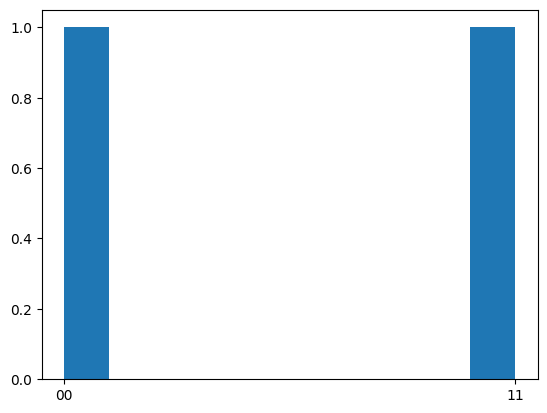

In [13]:
# Function to create Bell states and apply Hadamard and CNOT gates
def bell_state_operations():
    # Initialize the quantum circuit with 2 qubits
    qc = QuantumCircuit(2, 2)
    
    # Create a Bell state (|00⟩ + |11⟩)/sqrt(2)
    qc.h(0)  # Apply Hadamard gate to the first qubit
    qc.cx(0, 1)  # Apply CNOT gate with control qubit 0 and target qubit 1
    
    # Measure the first qubit
    qc.measure(0, 0)
    
    # Measure the second qubit
    qc.measure(1, 1)
    
    # Execute the circuit on the simulator
    simulator = Aer.get_backend('qasm_simulator')
    # result = execute(qc, simulator, shots=1024).result()
    result = transpile(qc, simulator)
    result = simulator.run(result,shots = 1024).result()
    
    counts = result.get_counts(qc)
    # Plot the results
    plt.hist(counts)
    plt.show()

# Run the function
bell_state_operations()